In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from latexify import latexify, format_axes
from sklearn.tree import DecisionTreeRegressor


import ipywidgets as widgets


In [2]:
latexify(columns=2)

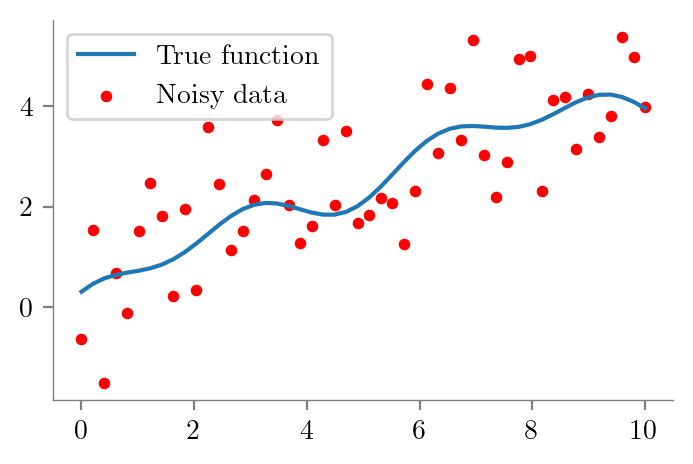

In [3]:
x_overall = np.linspace(0, 10, 50)
f_x = 0.3*np.sin(x_overall) + 0.3*np.cos(2*x_overall)+ 0.6*x_overall - 0.01*x_overall**2 - 0.001*x_overall**3

eps = np.random.normal(0, 1, 50)
y_overall = f_x + eps
plt.plot(x_overall, f_x, label = 'True function')
plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
format_axes(plt.gca())
plt.legend()

In [8]:
def fit_plot_tree(x, y, depth=1, extra=None):
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(x.reshape(-1, 1), y)
    y_pred = dt.predict(x.reshape(-1, 1))
    plt.figure()

    plt.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    label = r"$\hat{f}$" if not extra else fr"$\hat{{f}}_{{{extra}}}$"

    plt.plot(x, y_pred, label = label, lw=2)

    format_axes(plt.gca())
    plt.legend()
    plt.title(f"Depth = {depth}")
    return dt

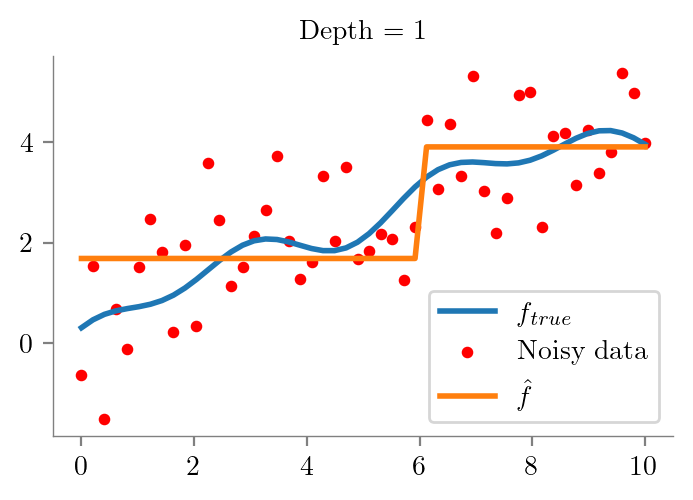

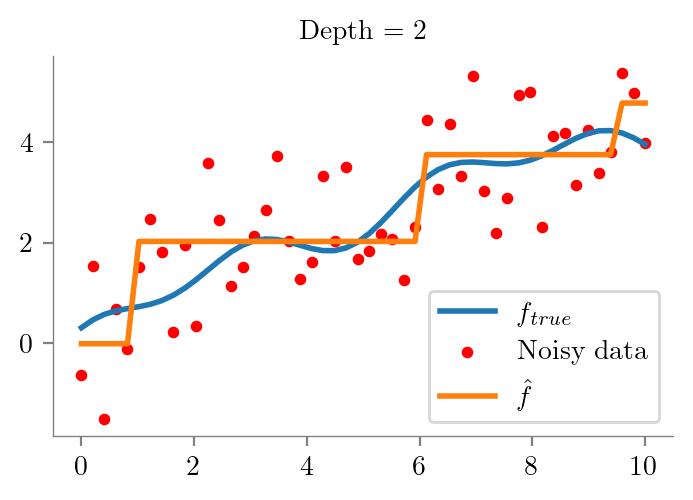

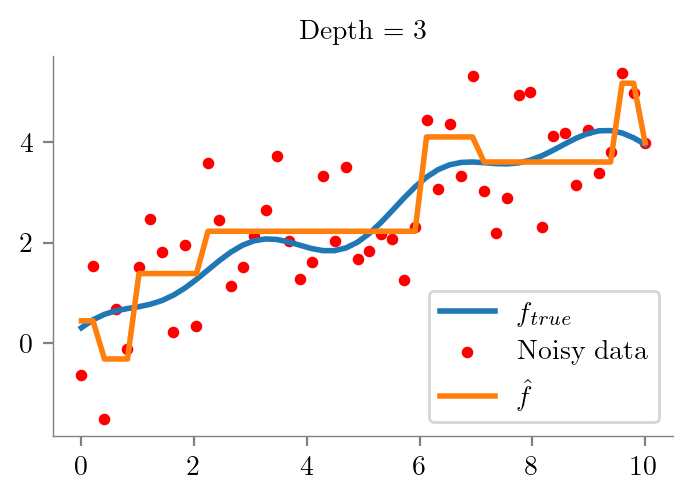

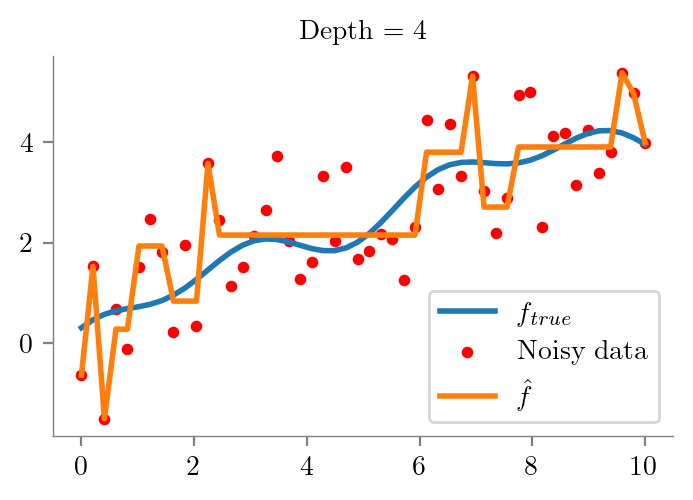

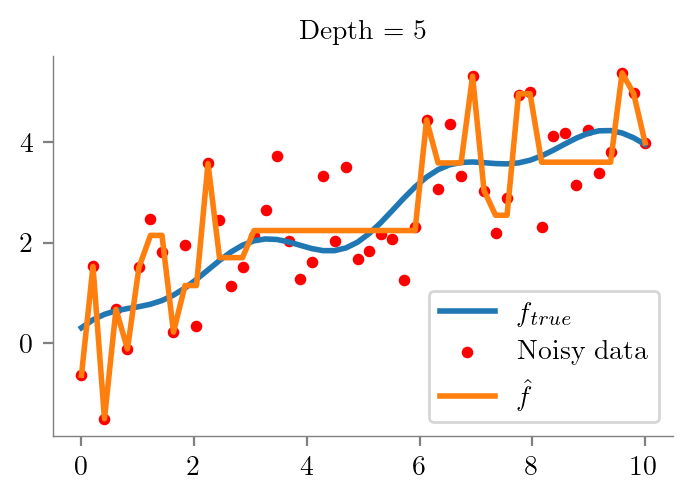

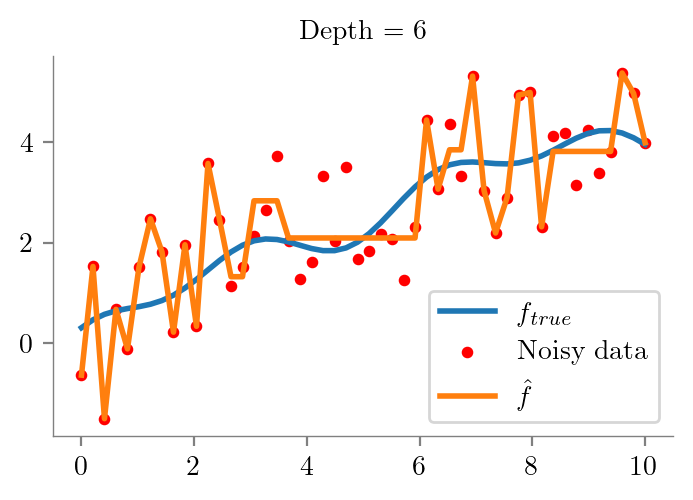

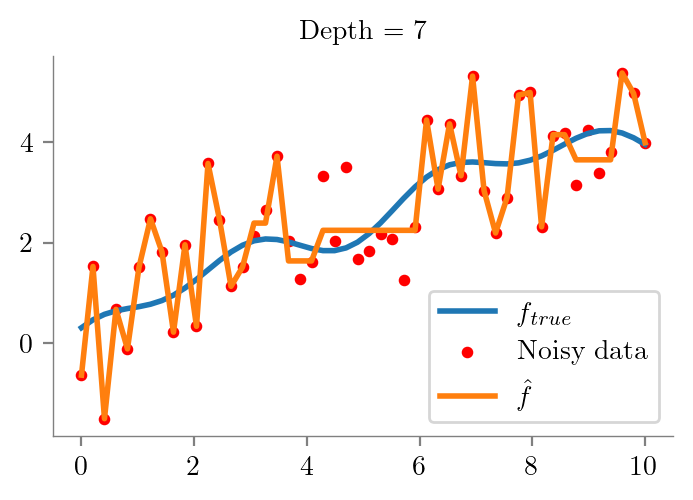

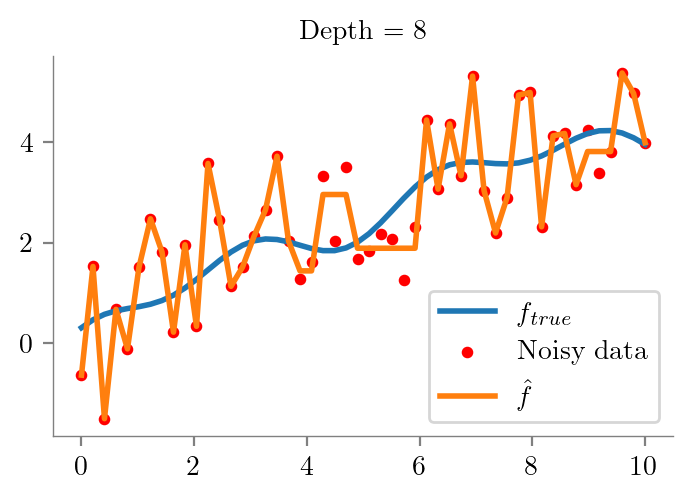

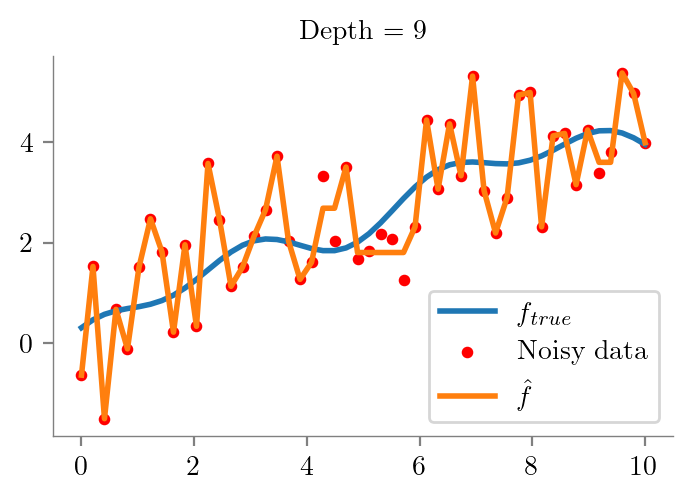

In [9]:
for i in range(1, 10):
    fit_plot_tree(x_overall, y_overall, i)

In [22]:
def plot_depth(depth=1):
    dts = []
    for i in range(10):
        idx = np.random.choice(50, 20, replace=False)
        # sort index
        idx.sort()
        #plt.figure()
        dts.append(fit_plot_tree(x_overall[idx].reshape(-1, 1), y_overall[idx], depth, i))
        plt.scatter(x_overall[idx], y_overall[idx], s=50, c='b', label = 'Sample', alpha=0.1)
    return dts


1
2
3
4


/tmp/ipykernel_1810641/1352185668.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


5
6
7


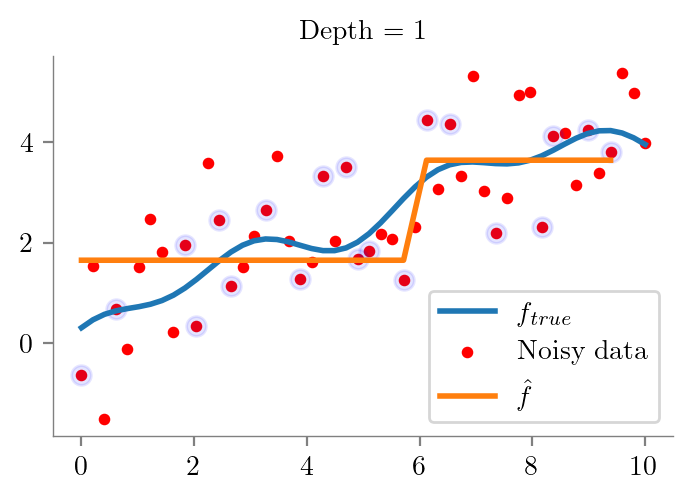

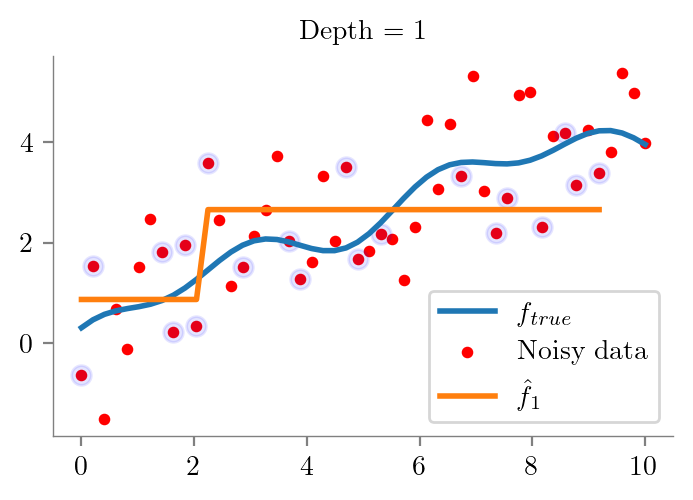

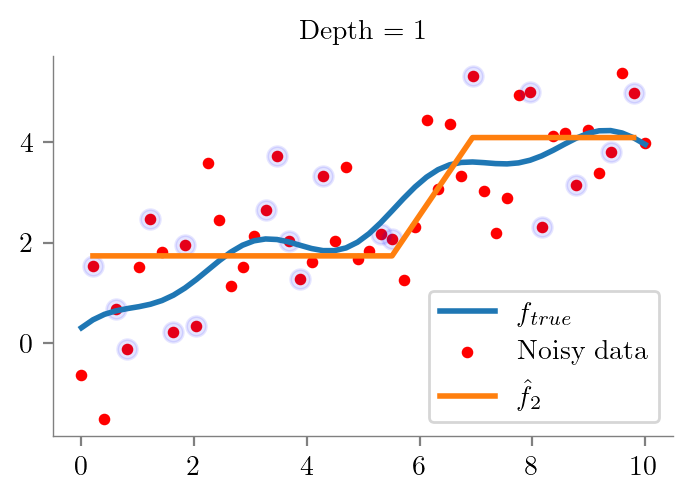

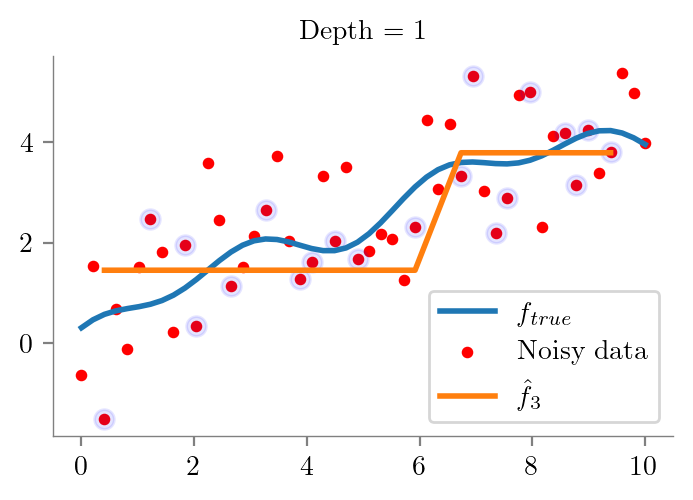

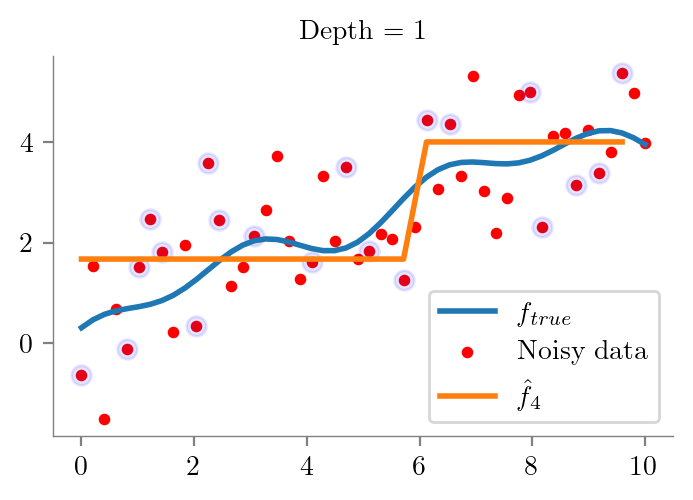

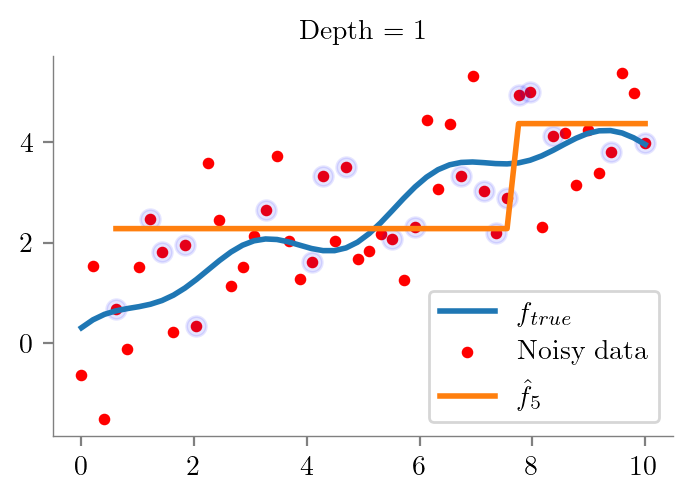

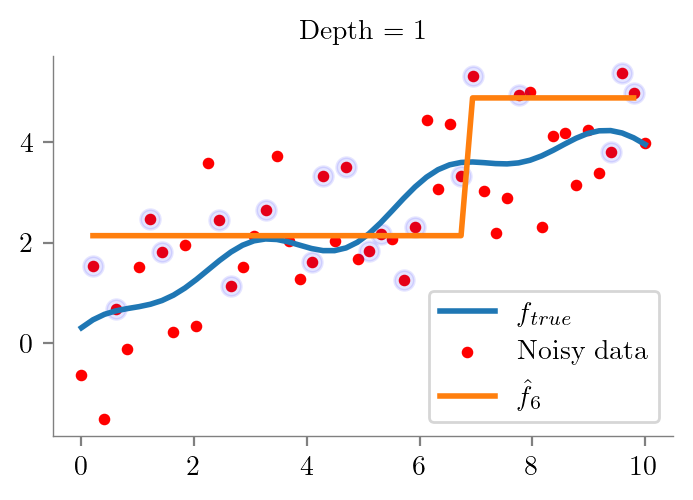

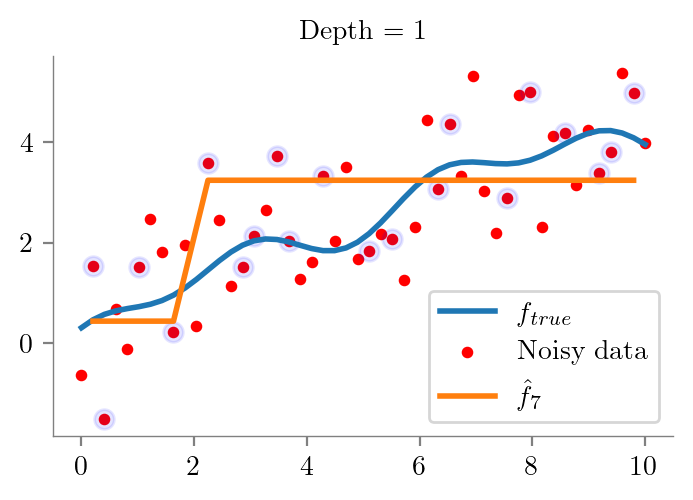

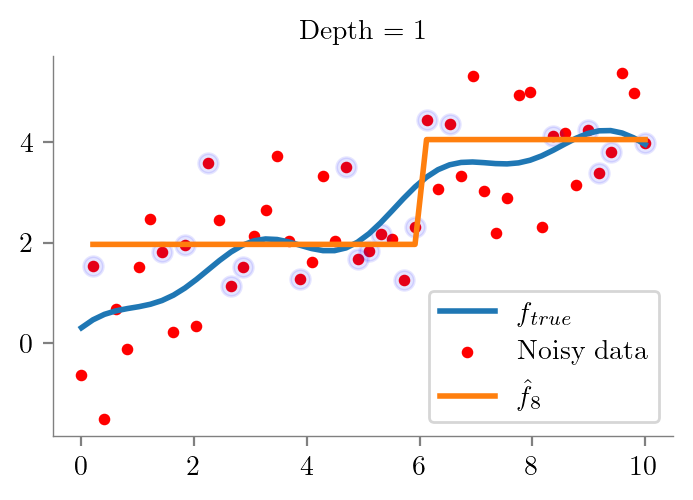

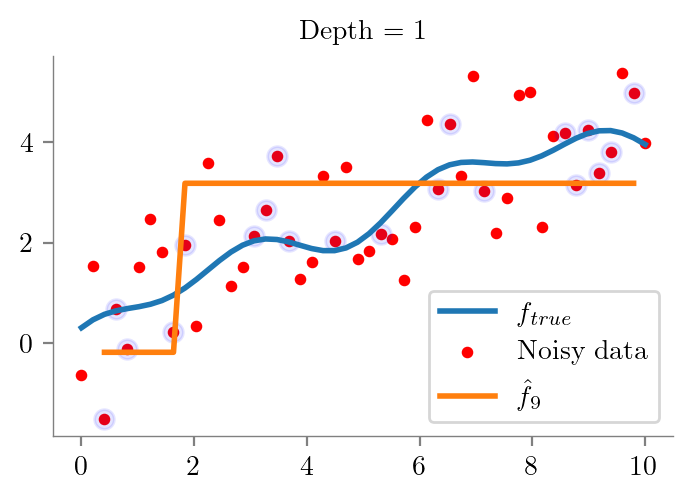

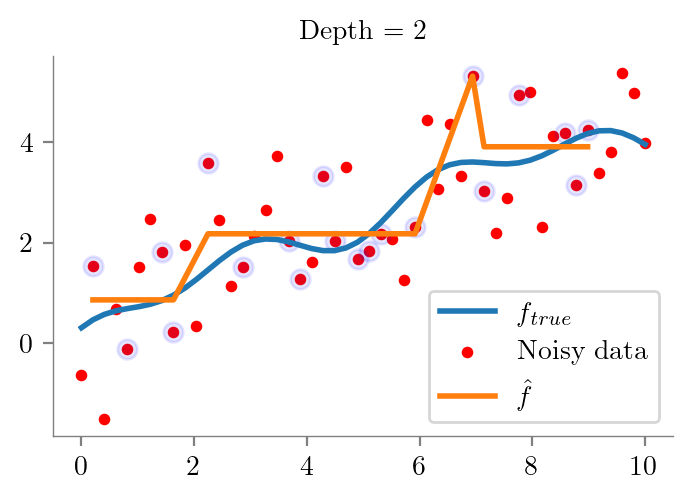

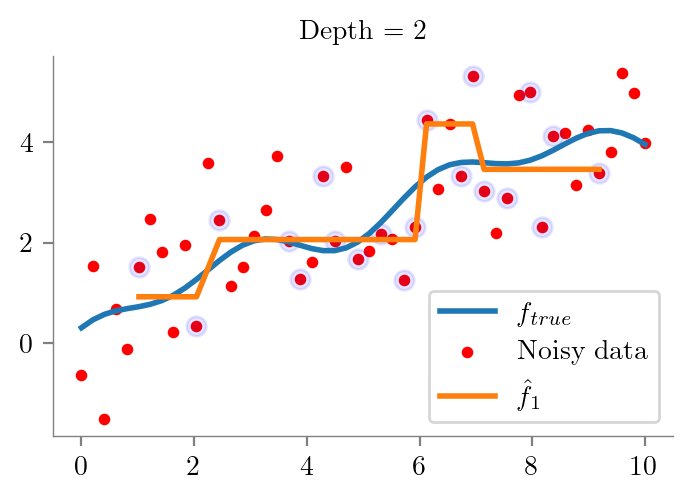

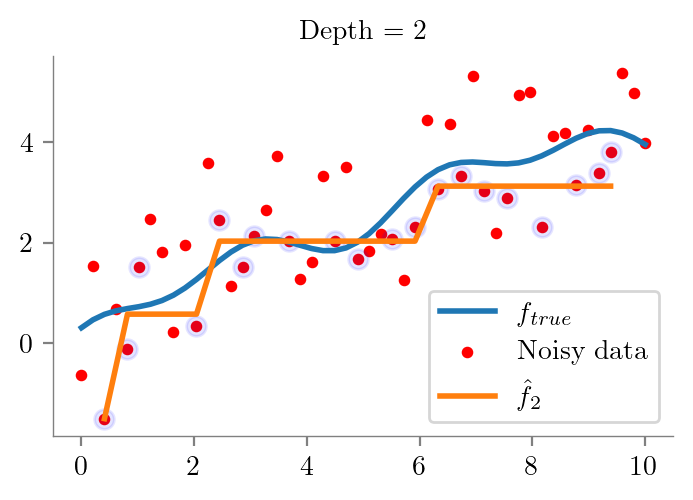

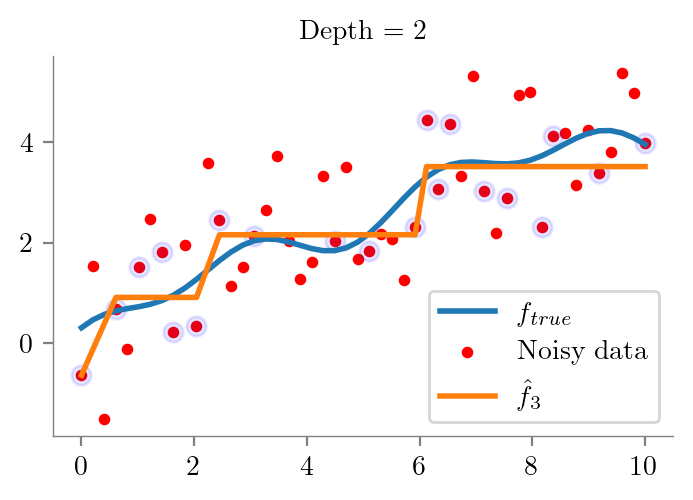

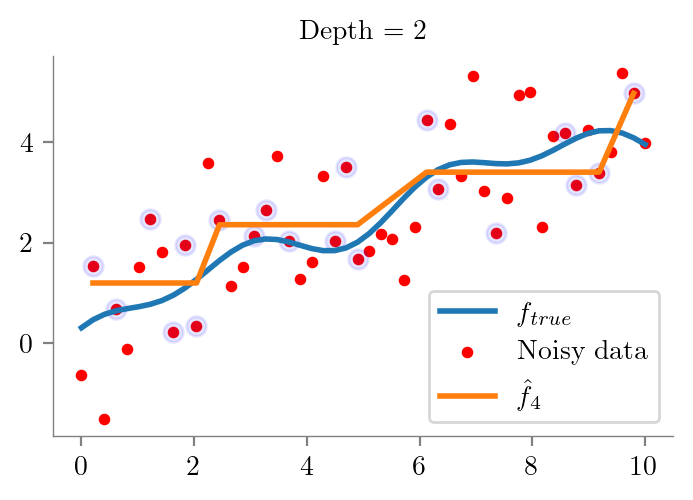

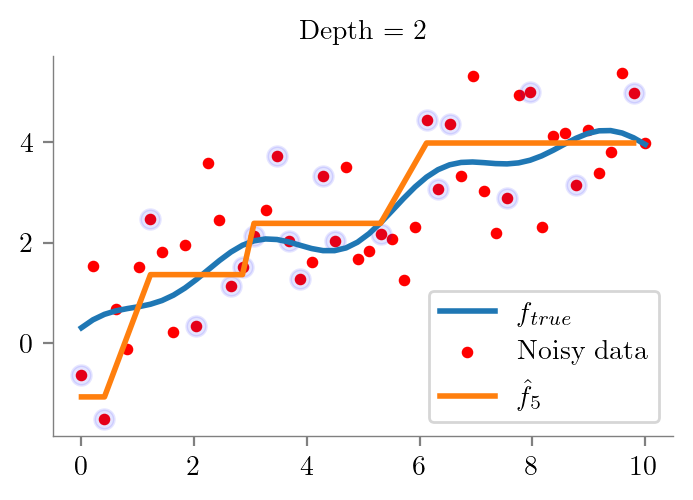

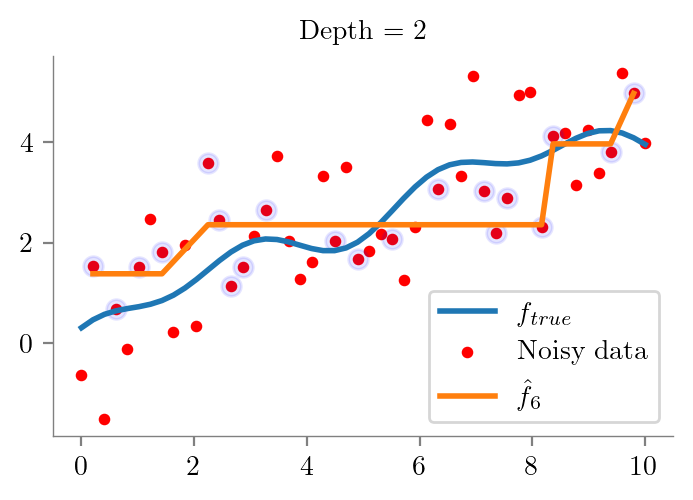

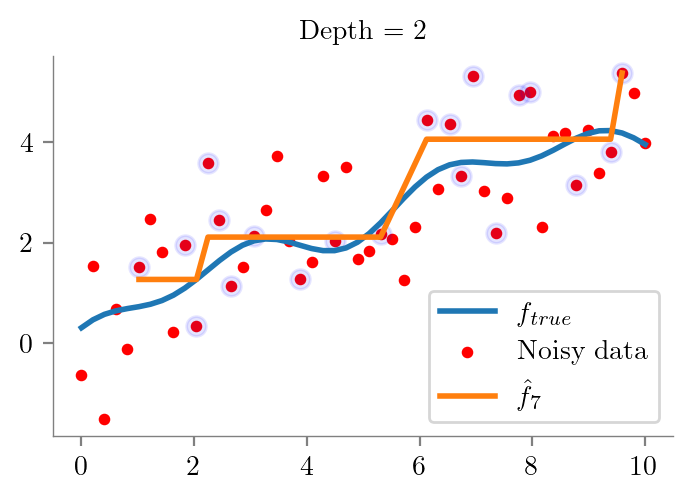

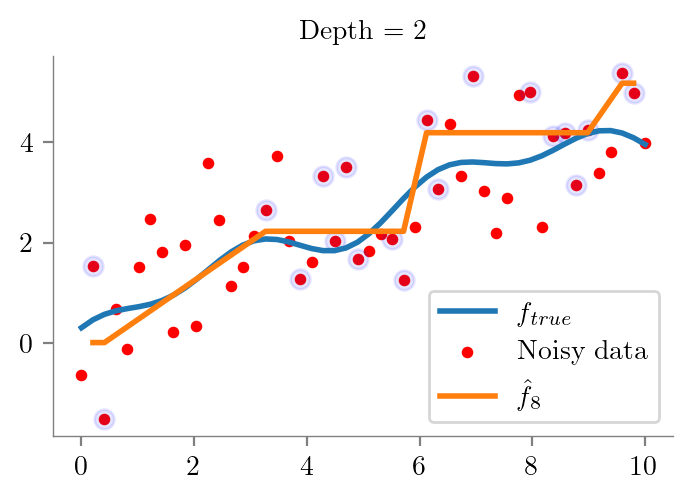

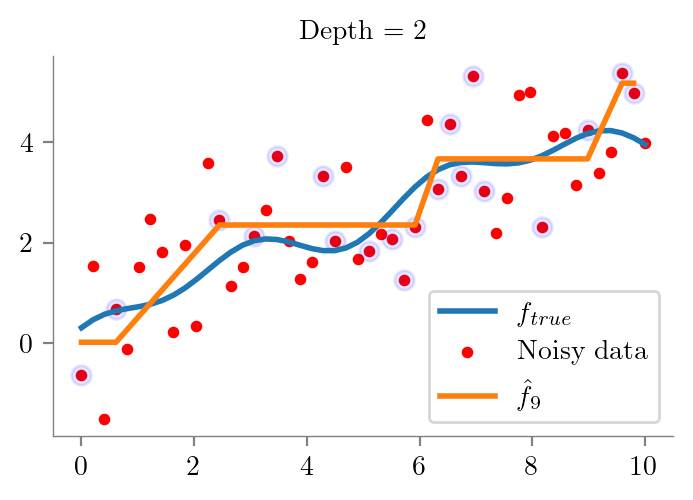

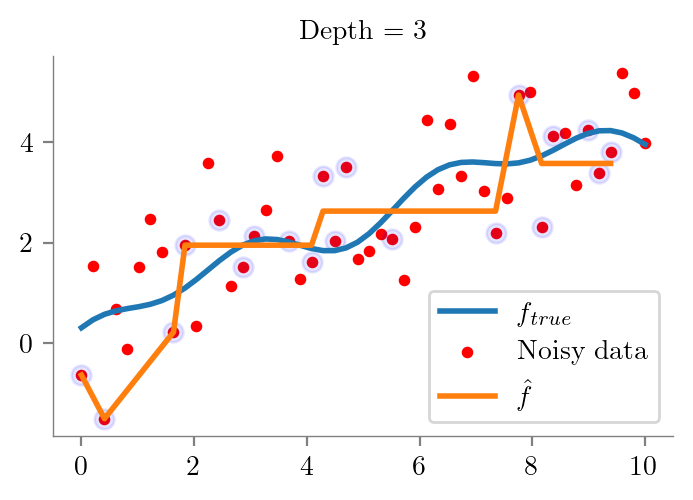

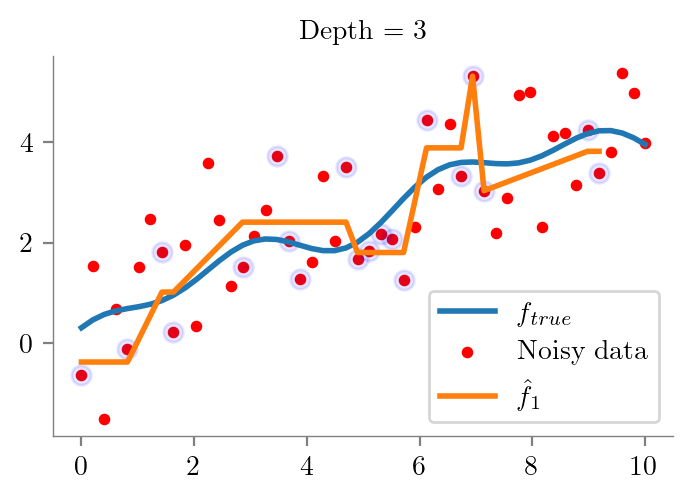

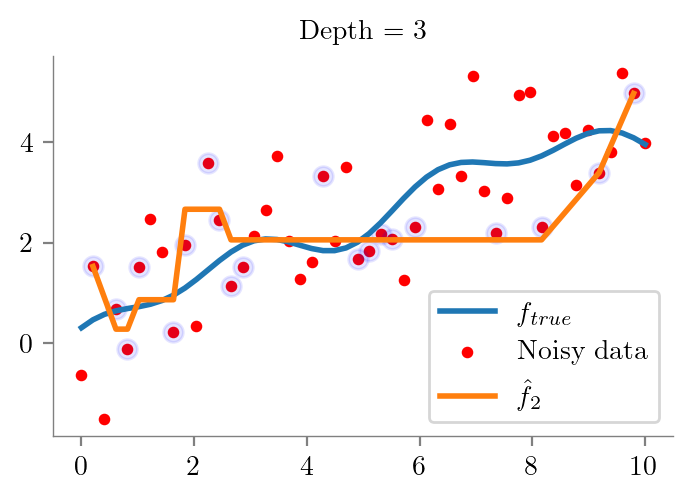

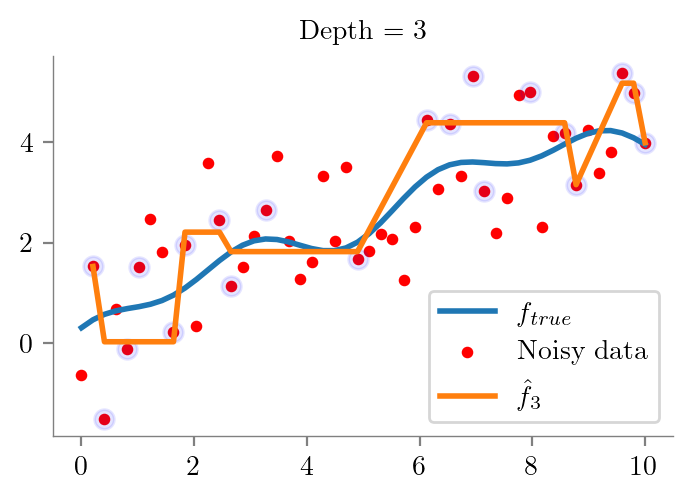

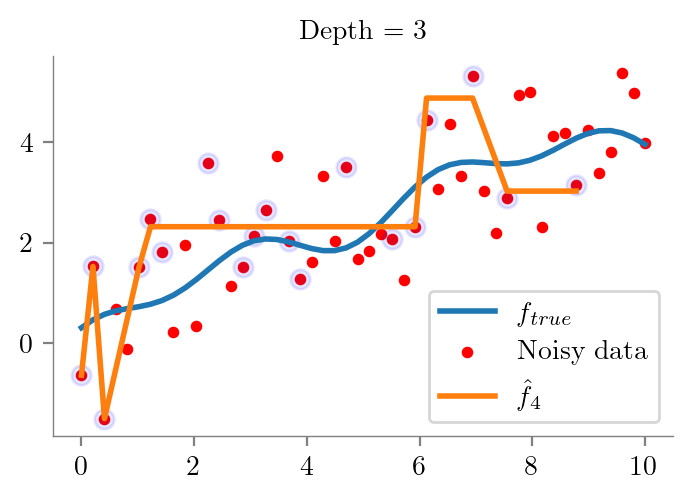

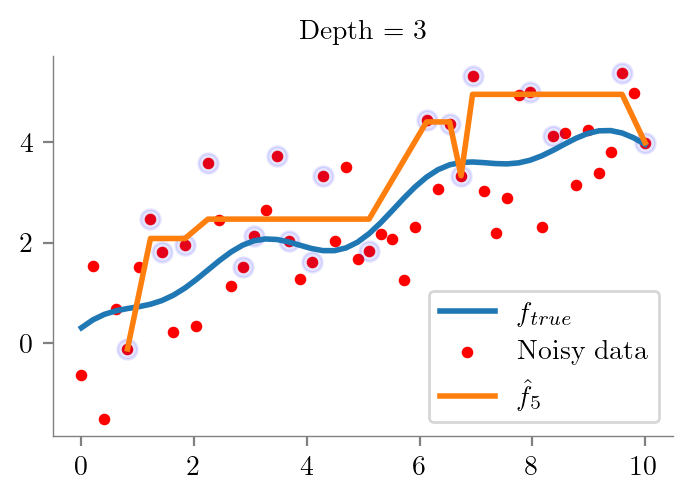

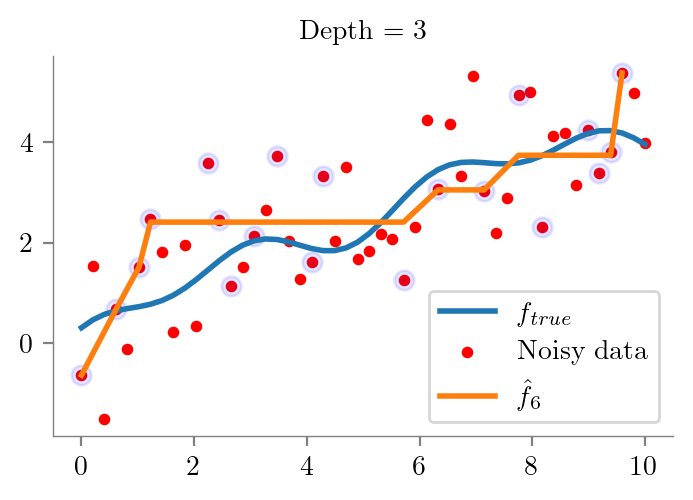

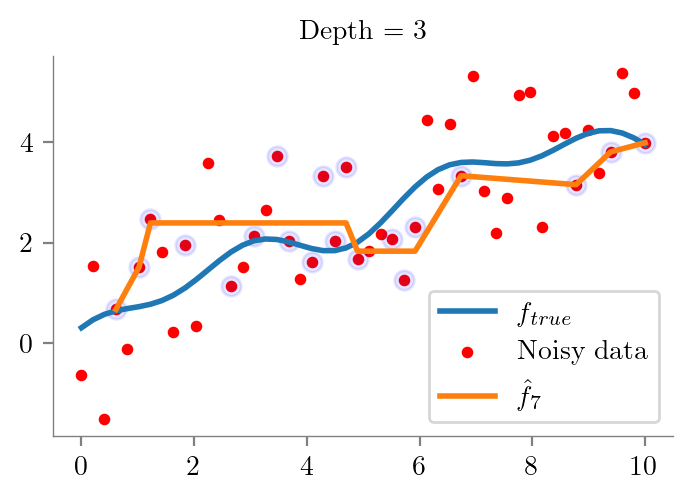

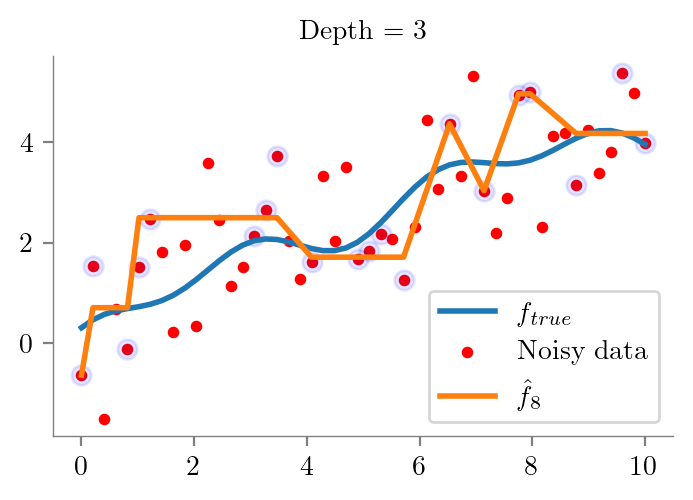

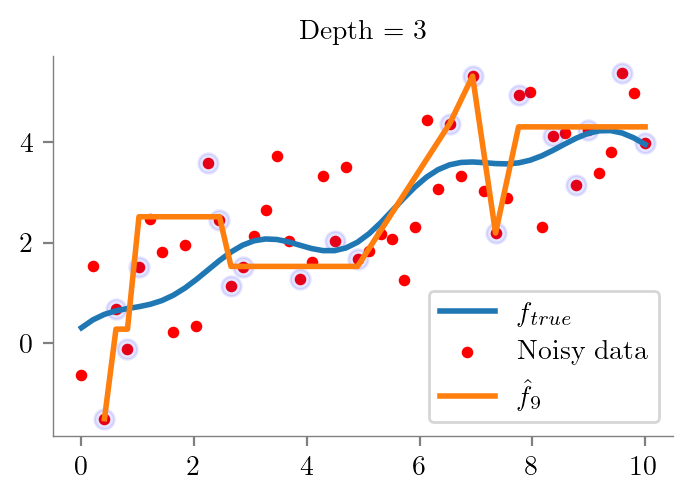

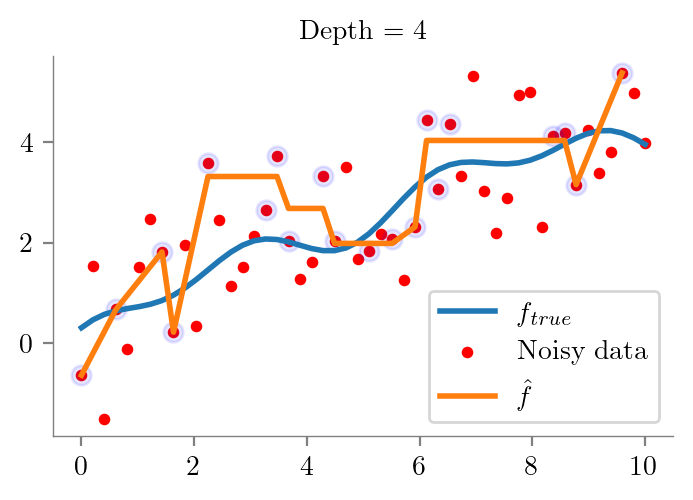

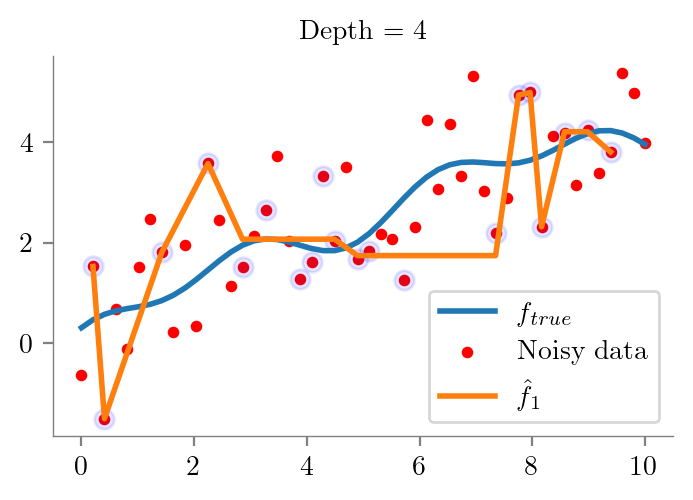

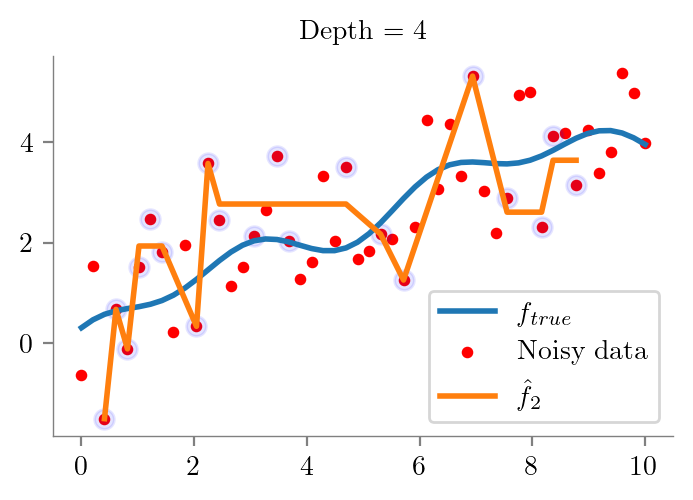

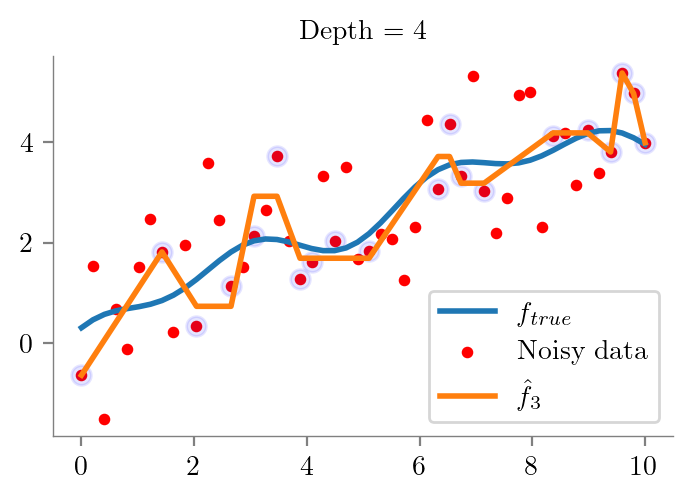

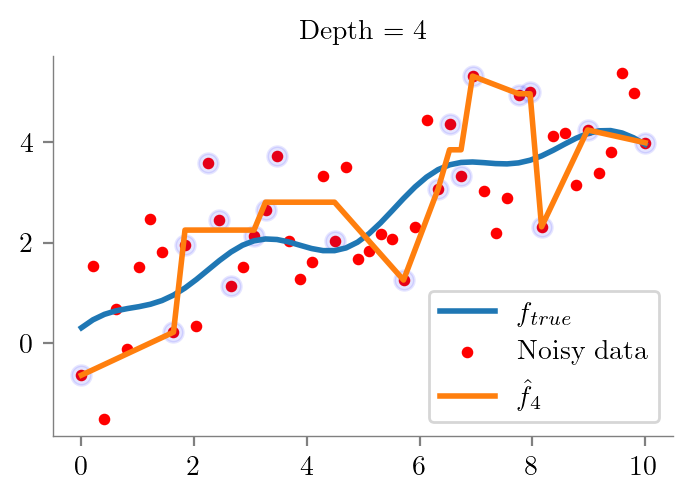

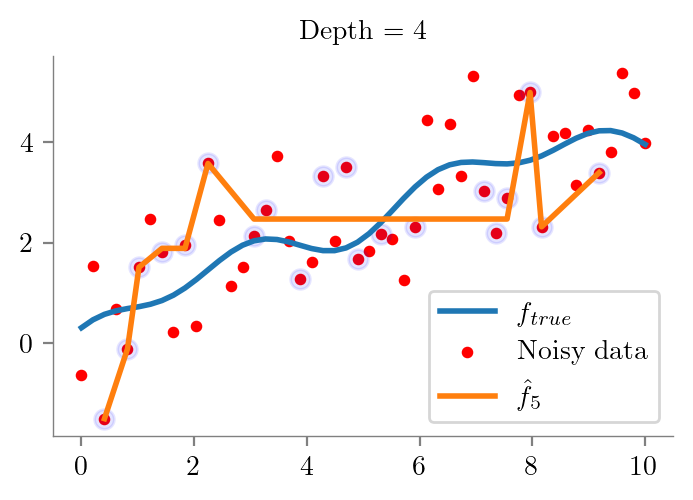

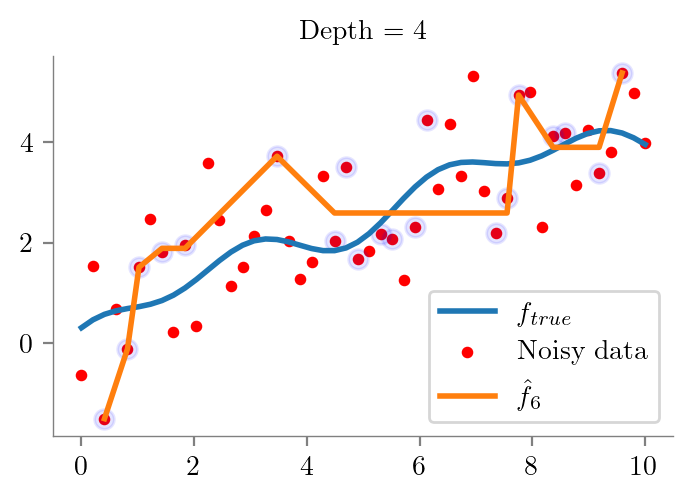

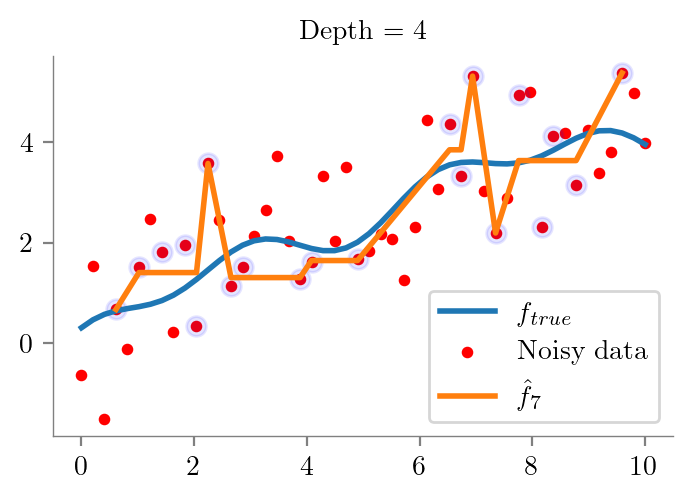

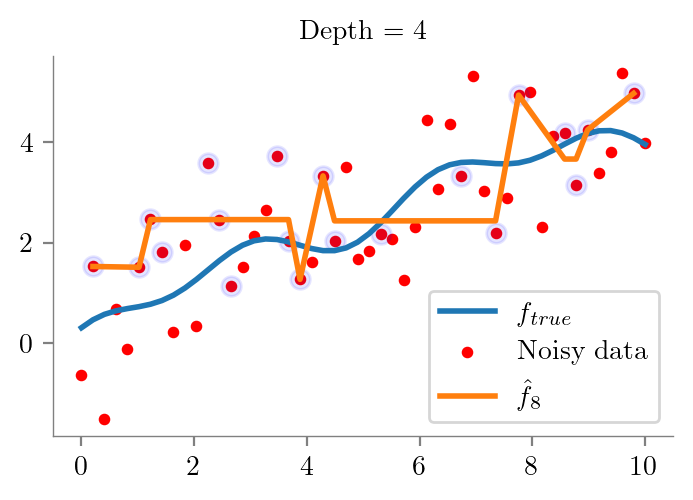

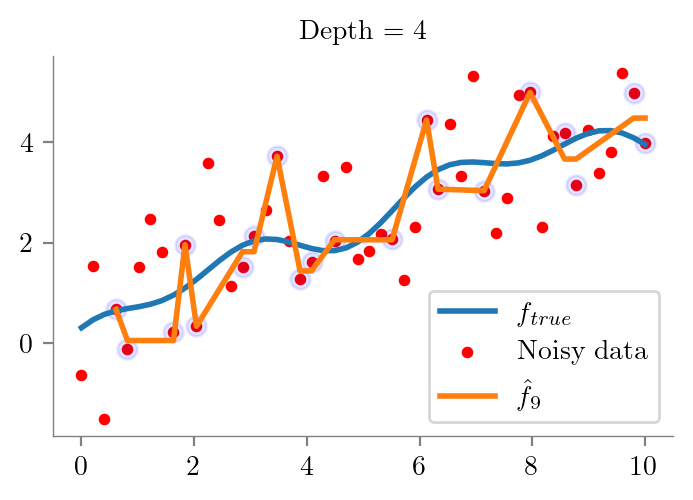

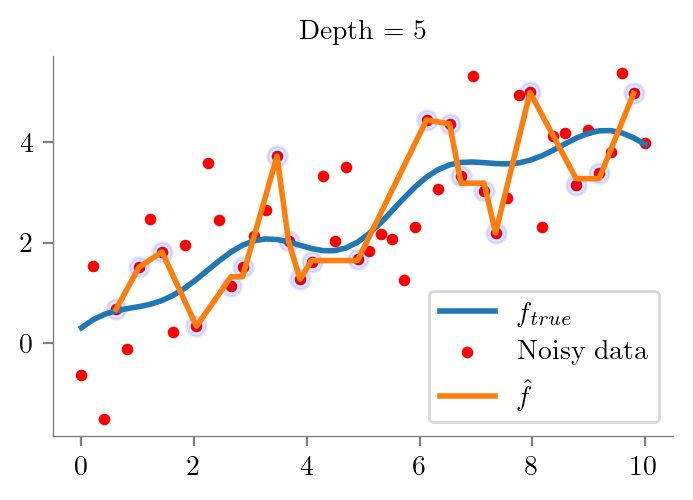

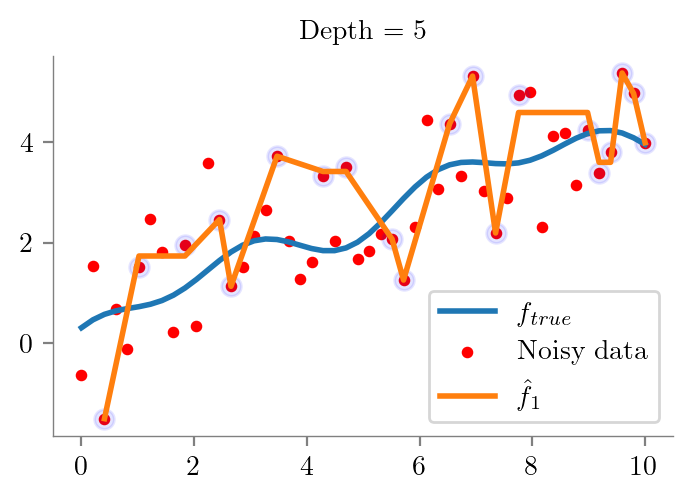

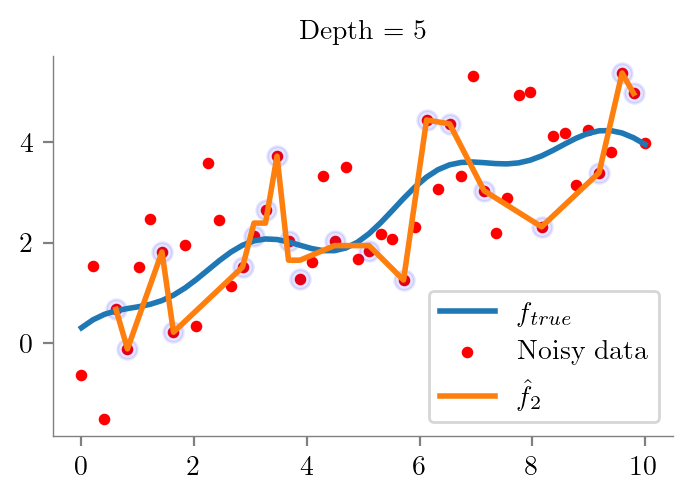

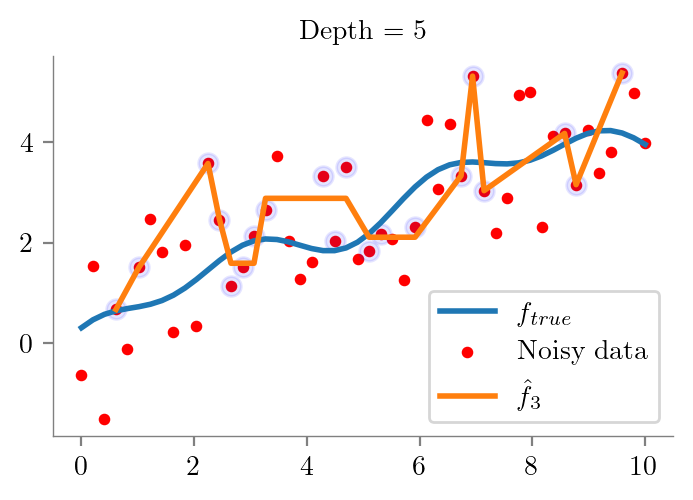

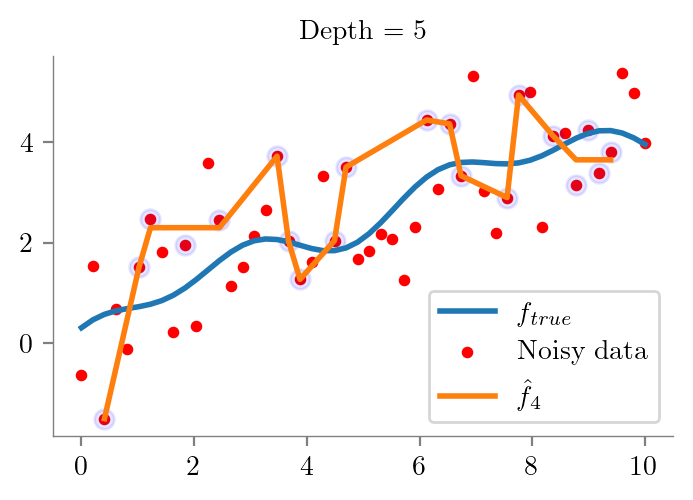

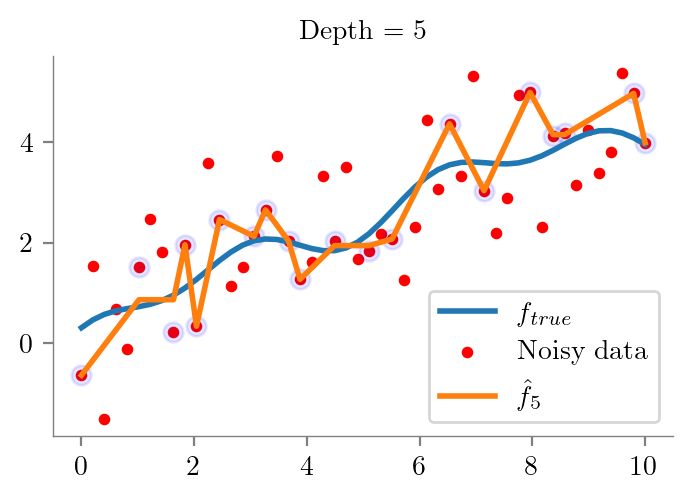

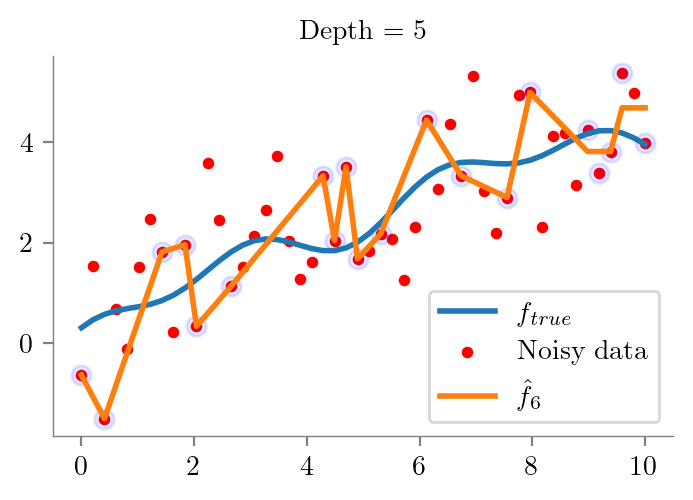

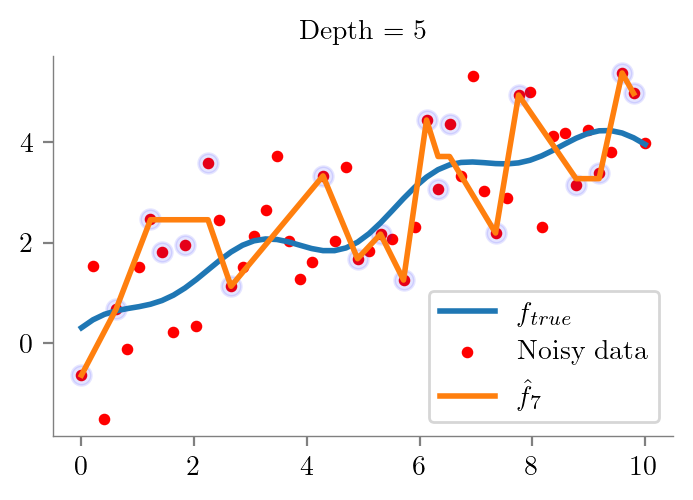

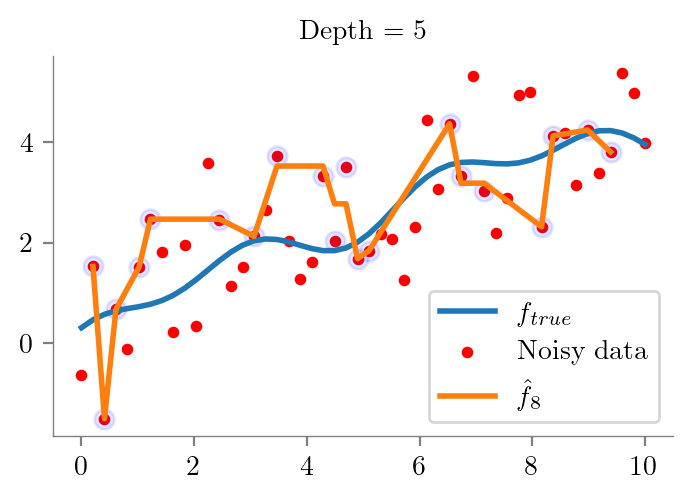

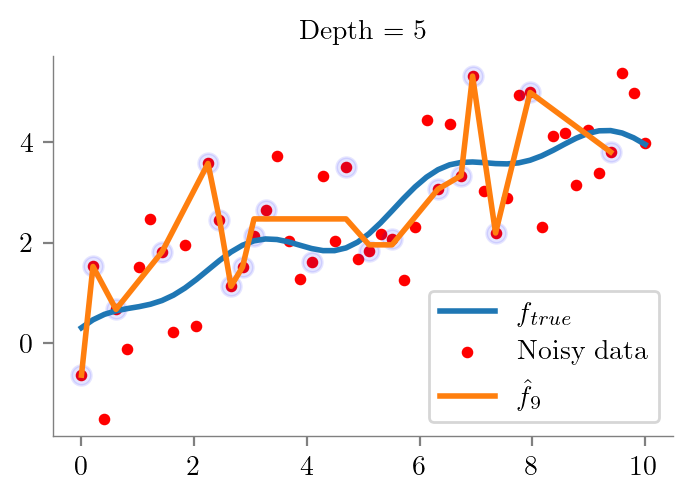

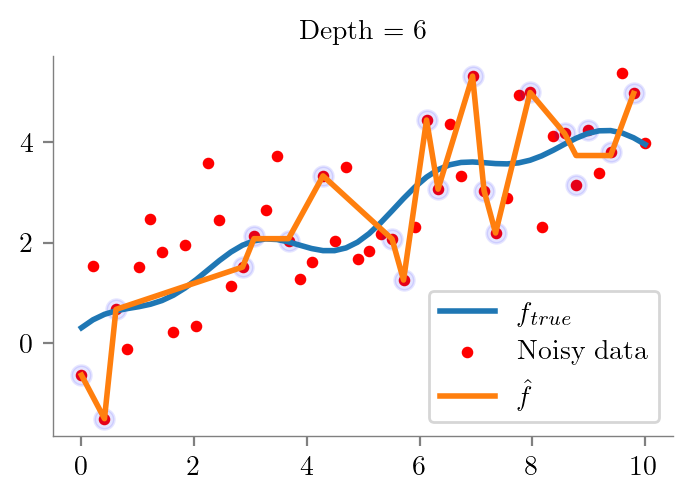

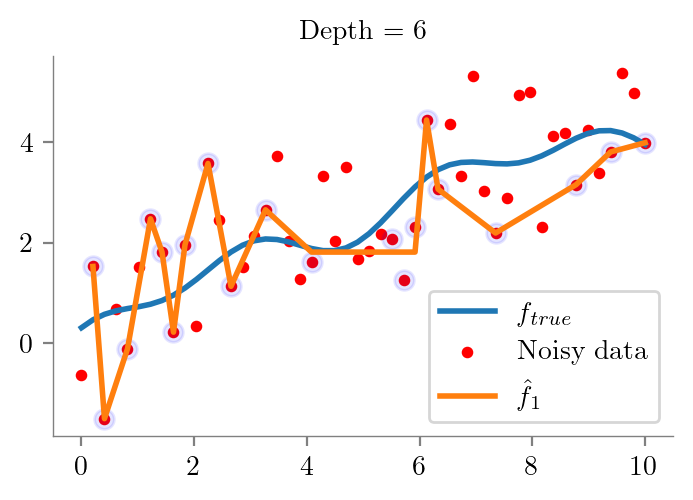

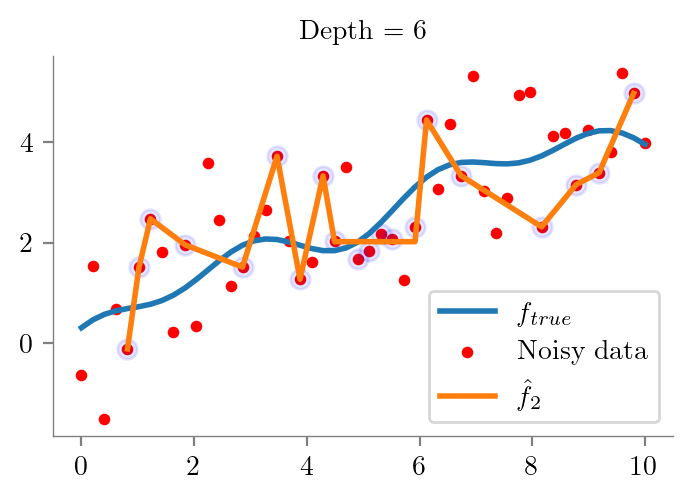

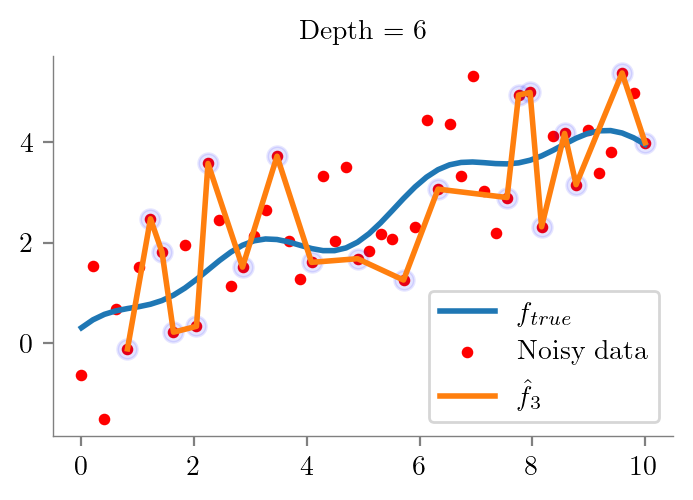

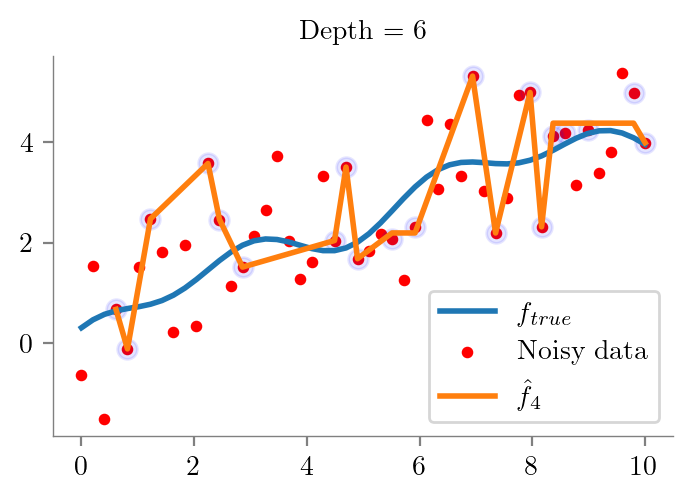

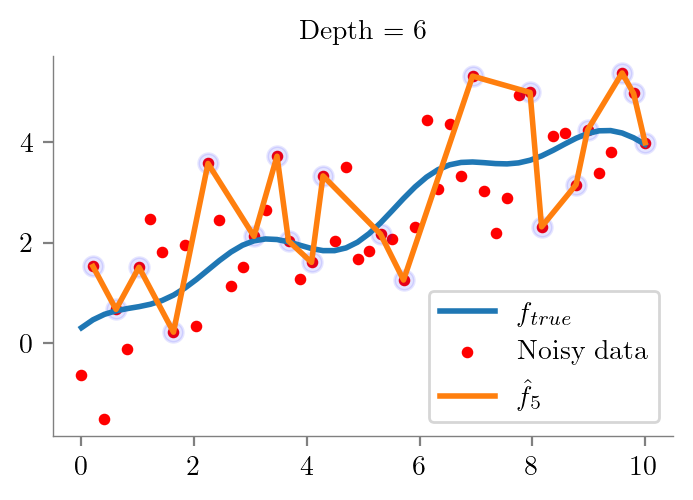

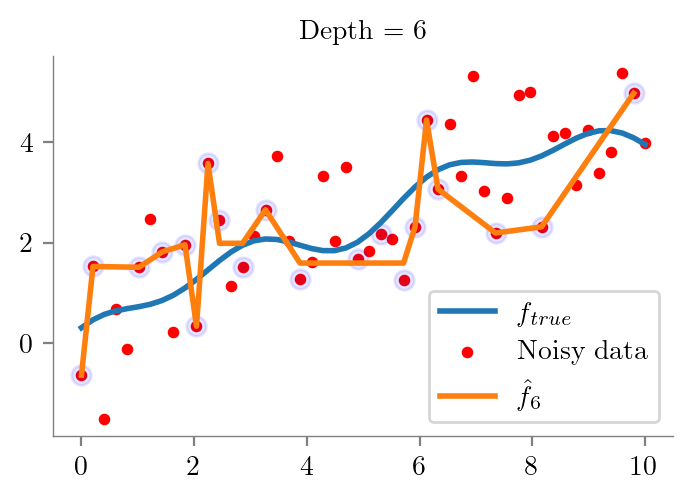

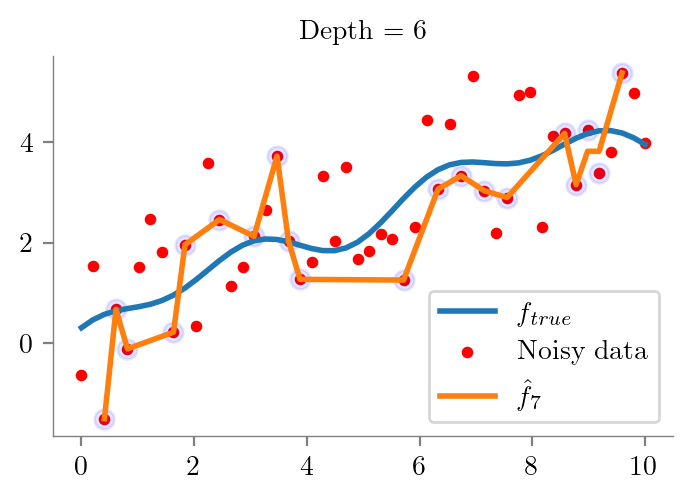

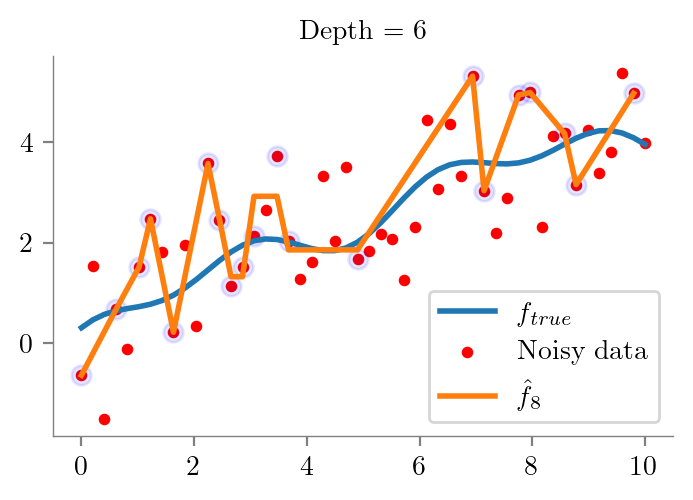

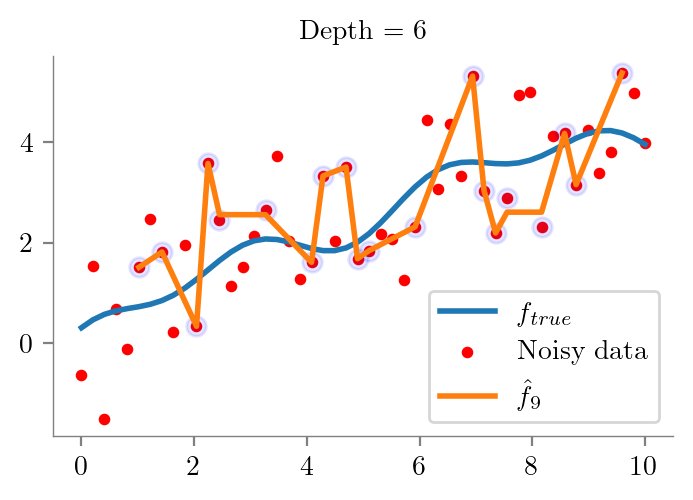

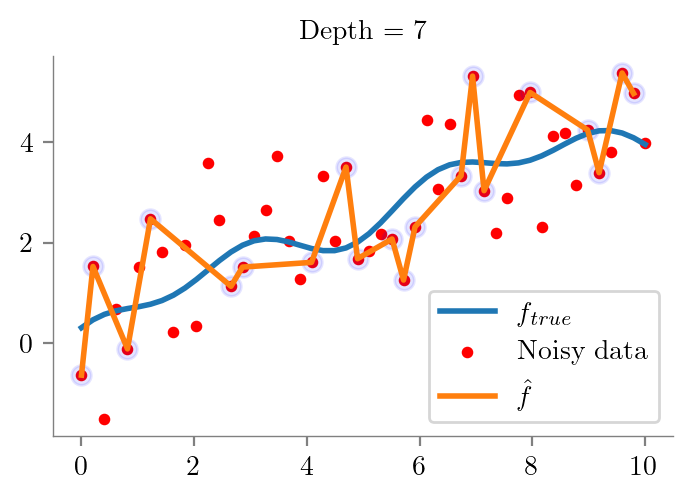

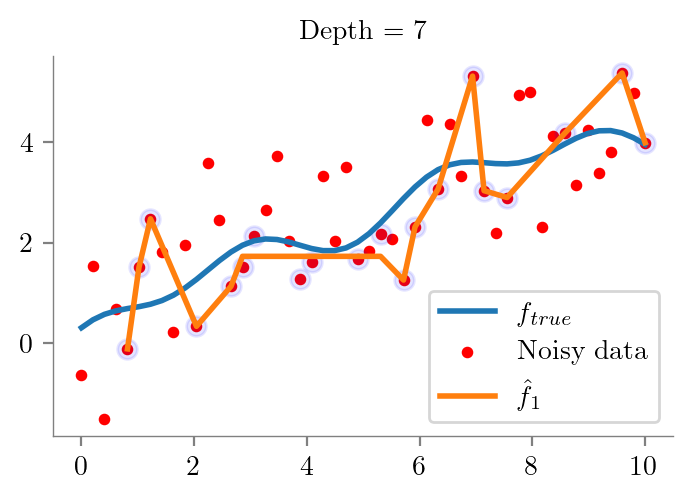

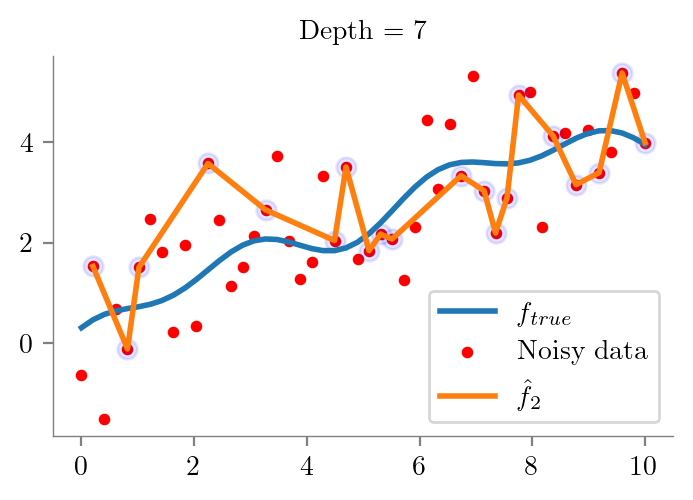

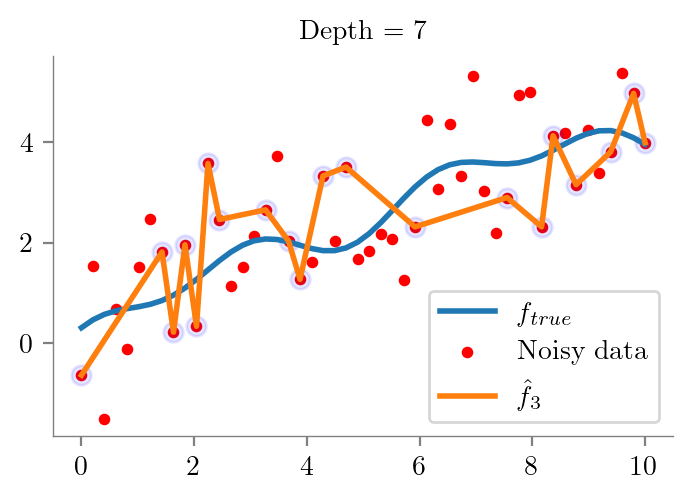

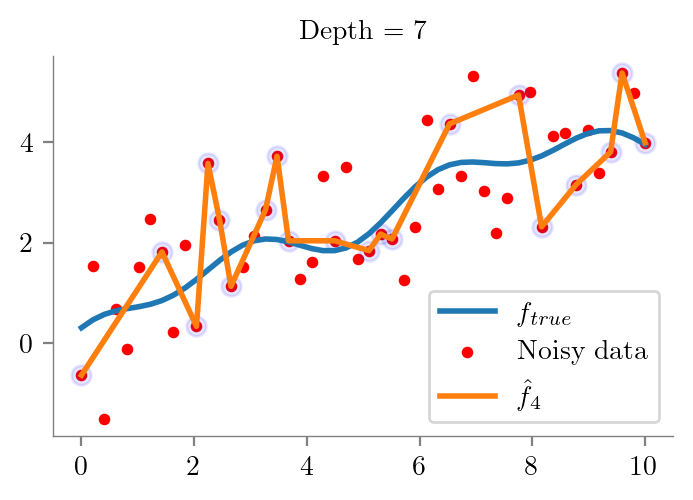

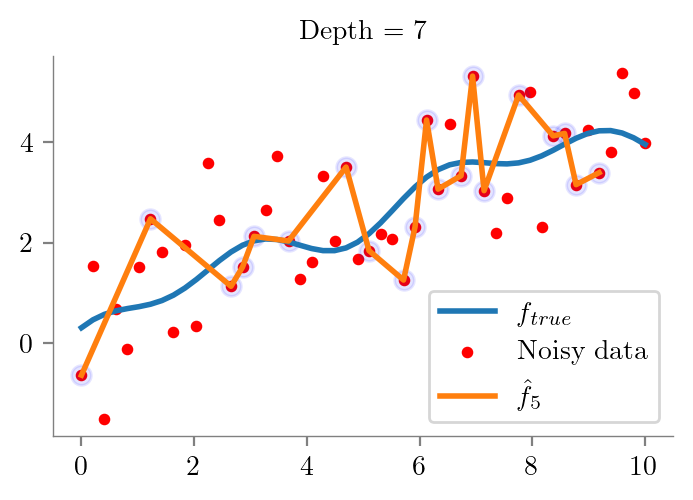

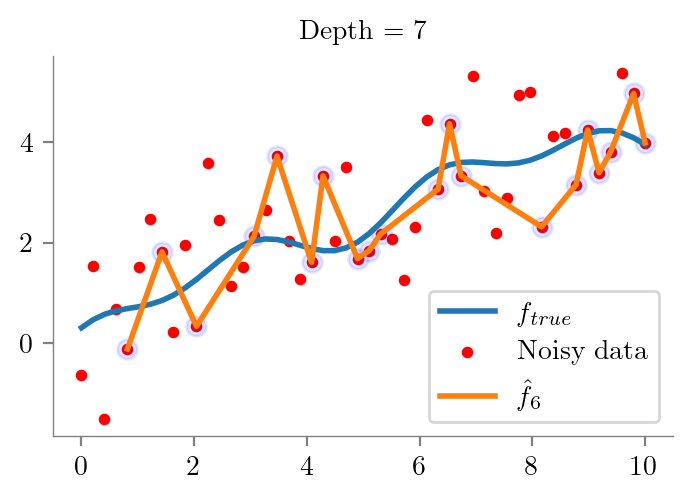

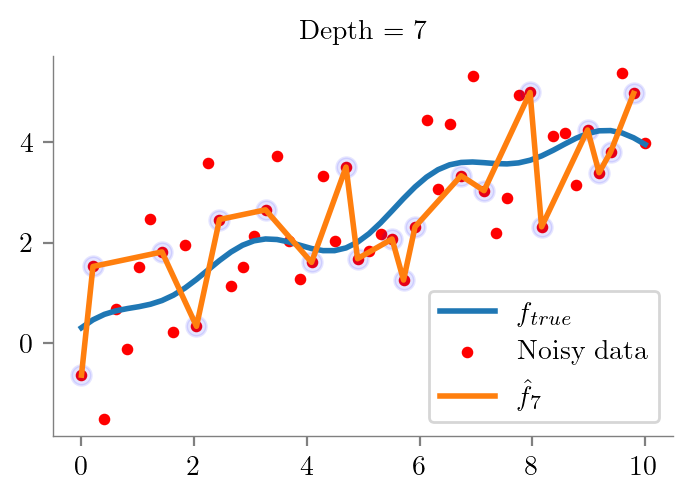

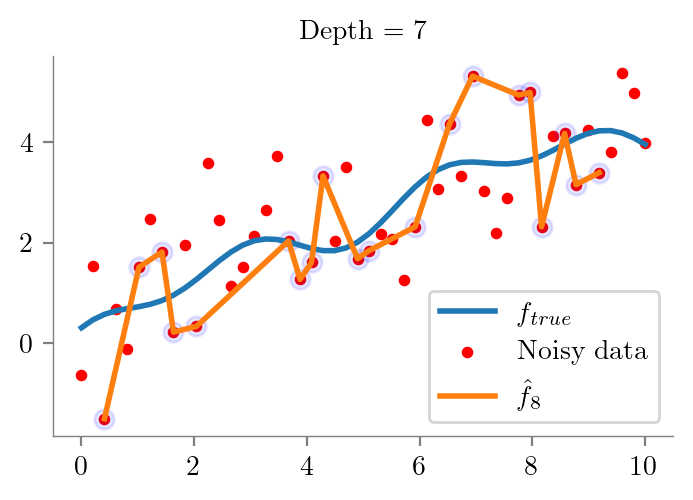

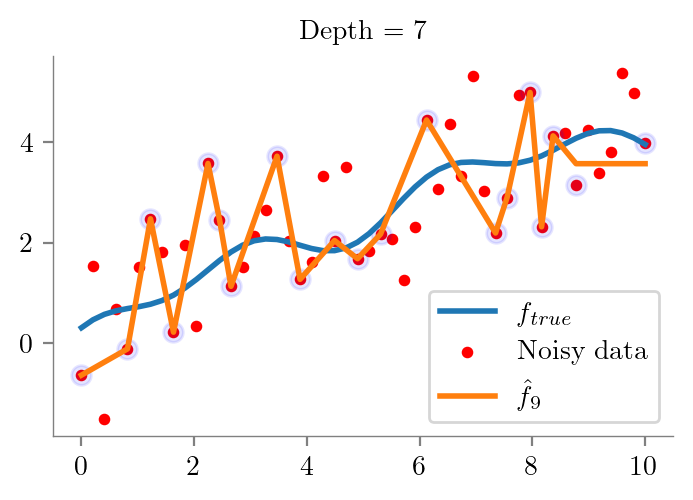

In [23]:
dts = {}
for depth in range(1, 8):
    print(depth)
    dts[depth] = plot_depth(depth)


In [24]:
def plot_bias(dts):
    x_test = np.linspace(0, 10, 50)
    y_pred = np.zeros((10, 50))
    for i in range(10):
        y_pred[i] = dts[i].predict(x_test.reshape(-1, 1))
    y_pred_mean = np.mean(y_pred, axis=0)
    y_pred_var = np.var(y_pred, axis=0)

    plt.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    #plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    plt.plot(x_test, y_pred_mean, label = r'$\bar{f}$', lw=2)
    plt.fill_between(x_test, y_pred_mean, f_x, alpha=0.2, color='green', label = 'Bias')
    plt.legend()
    

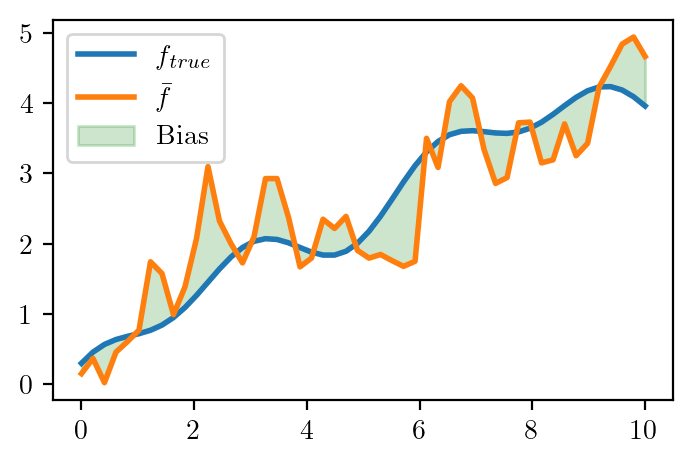

In [31]:
plot_bias(dts[6])

In [26]:
def plot_variance(dts):
    x_test = np.linspace(0, 10, 50)
    y_pred = np.zeros((10, 50))
    for i in range(10):
        y_pred[i] = dts[i].predict(x_test.reshape(-1, 1))
    y_pred_mean = np.mean(y_pred, axis=0)
    y_pred_var = np.var(y_pred, axis=0)

    plt.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    #plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    plt.plot(x_test, y_pred_mean, label = r'$\bar{f}$', lw=2)
    plt.fill_between(x_test, y_pred_mean - y_pred_var, y_pred_mean + y_pred_var, alpha=0.2, color='red', label = 'Variance')
    plt.legend()


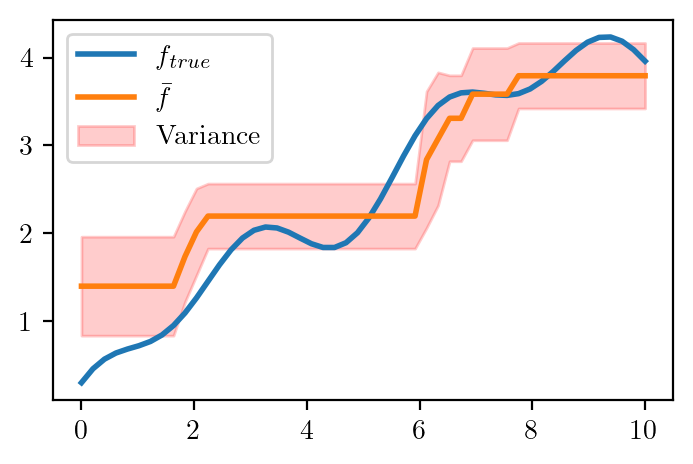

In [29]:
plot_variance(dts[1])